In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy.stats import norm
b
%matplotlib inline

In [2]:
df=pd.read_csv('airport.csv')
df.head(3)

C:\Users\bigbo\AppData\Local\Temp\ipykernel_33140\1124094302.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('airport.csv')


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL


In [3]:
rows=df.shape[0]
print('The total number or rows in this dataset is {}'.format(rows))

The total number or rows in this dataset is 245955


In [4]:
df.rename(columns={'fare':'AverageFare', 'fare_lg':'LargestFare',
                    'carrier_lg':'LargestCarrier', 'large_ms':'MarketShareLG', 'airport_1':'OriginAirport'}, inplace=True)
df.head(3)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,OriginAirport,...,AverageFare,LargestCarrier,MarketShareLG,LargestFare,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL


Before we go any further, I am going to rename the columns that I plan on using for a better description.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,245955.0,2008.524124,8.703364,1993.0000,2001.000,2008.0000,2016.0000,2024.0
quarter,245955.0,2.479153,1.122149,1.0000,1.000,2.0000,3.0000,4.0
citymarketid_1,245955.0,31556.430201,1089.872880,30135.0000,30721.000,31423.0000,32467.0000,35412.0
citymarketid_2,245955.0,32180.117086,1232.464184,30189.0000,30994.000,32211.0000,33192.0000,35628.0
airportid_1,245955.0,12437.099986,1431.665257,10135.0000,11193.000,12266.0000,13487.0000,16440.0
airportid_2,245955.0,13249.889525,1425.810159,10466.0000,12197.000,13303.0000,14679.0000,15919.0
nsmiles,245955.0,1189.812319,703.143472,109.0000,626.000,1023.0000,1736.0000,2724.0
passengers,245955.0,299.476795,511.389486,0.0000,21.000,113.0000,339.0000,8301.0
AverageFare,245955.0,218.979587,82.372486,50.0000,164.620,209.3200,262.8900,3377.0
MarketShareLG,244415.0,0.665252,0.224635,0.0038,0.480,0.6524,0.8719,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   OriginAirport   245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  AverageFare     245955 non-null  float64
 14  LargestCarrier  244415 non-null  object 
 15  MarketShareLG   244415 non-null  float64
 16  LargestFare     244415 non-null  float64
 17  carrier_lo

Here we can see that there appears to be some missing data in the columns carrier_lg, large_ms, fare_lg, carrier_low, lf_ms, fare_low, geocoded_city1, geocoded_city2 and tbl1apk.

In [7]:
df.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
OriginAirport         0
airport_2             0
nsmiles               0
passengers            0
AverageFare           0
LargestCarrier     1540
MarketShareLG      1540
LargestFare        1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

This is helping us confirm that there are infact some null values from the listed columns mentioned above.

In [8]:
df1 = df[['OriginAirport','AverageFare','LargestFare', 'LargestCarrier',
                               'MarketShareLG']].copy()

I decided to create a new dataframe using only the fields that we need for this question by copying the original dataframe. This is to make working with the data a bit more concise.

In [9]:
df1.dropna(inplace = True)

I am going to drop all nan values to better sync the data going foreward.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244415 entries, 0 to 245954
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   OriginAirport   244415 non-null  object 
 1   AverageFare     244415 non-null  float64
 2   LargestFare     244415 non-null  float64
 3   LargestCarrier  244415 non-null  object 
 4   MarketShareLG   244415 non-null  float64
dtypes: float64(3), object(2)
memory usage: 11.2+ MB


In [11]:
df1.isnull().sum()

OriginAirport     0
AverageFare       0
LargestFare       0
LargestCarrier    0
MarketShareLG     0
dtype: int64

Here I am double checking that there is indeed no more null values in the new dataset

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageFare,244415.0,218.441905,79.547855,50.0000,164.68,209.2700,262.6150,3377.0
LargestFare,244415.0,218.710963,84.674363,50.0000,161.50,208.0300,263.6400,2725.6
MarketShareLG,244415.0,0.665252,0.224635,0.0038,0.48,0.6524,0.8719,1.0


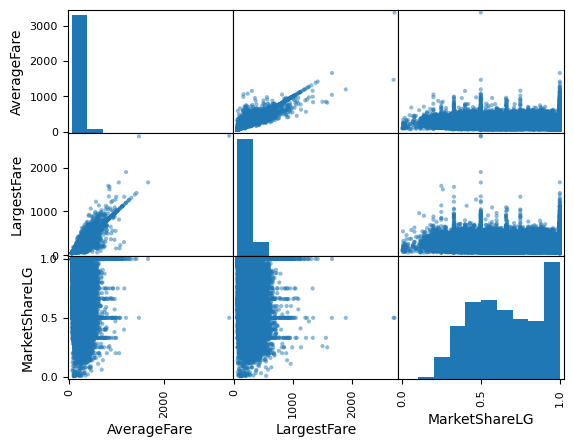

In [13]:
pd.plotting.scatter_matrix(df1);

I am using a scatter matrix here to get an overall visual of any top level correlation of the data.

In [14]:
diff = df1['LargestFare'] - df1['AverageFare']
df2 = df1[diff == diff]

df2.head()

,OriginAirport,AverageFare,LargestFare,LargestCarrier,MarketShareLG
0,ABE,81.43,81.43,G4,1.0000
1,ABE,208.93,219.98,DL,0.4659
2,ABQ,184.56,184.44,WN,0.9968
3,ABQ,182.64,183.09,AA,0.9774
4,ABQ,177.11,184.49,WN,0.6061


Here I wanted to find the difference between the largest fare and average fare.

In [15]:
df2.OriginAirport.describe()

count     244415
unique       183
top          ORD
freq        8788
Name: OriginAirport, dtype: object

In [16]:
df2.LargestCarrier.describe()

count     244415
unique        67
top           WN
freq       58999
Name: LargestCarrier, dtype: object

Here I wanted to find the new count of unique airports as well as the top Airport and the largest carrier after the difference of largest fare and average fair. 

In [17]:
top_10diff = (df2.value_counts()).iloc[:10]

print(top_10diff)

OriginAirport  AverageFare  LargestFare  LargestCarrier  MarketShareLG
SAC            102.00       102.00       WN              1.0              3
CHI            235.20       190.75       TW              0.8              3
DAL            73.00        73.00        WN              1.0              3
               72.00        72.00        WN              1.0              3
MDW            54.51        54.51        WN              1.0              3
DAL            70.50        70.50        WN              1.0              3
SWF            206.00       206.00       AA              1.0              3
ISP            180.10       180.10       US              1.0              3
DAL            65.98        65.98        WN              1.0              3
CHI            92.00        92.00        WN              1.0              3
Name: count, dtype: int64


Since there is so many columns of data in this dataset, I decided to find the top ten most frequently occuring values.

In [18]:
top_10Airport = (df2.value_counts('OriginAirport')).iloc[:10]
top_10Carrier = (df2.value_counts('LargestCarrier')).iloc[:10]
top_10Market = (df2.value_counts('MarketShareLG')).iloc[:10]

Text(0.5, 1.0, 'Top ten Origin Airports')

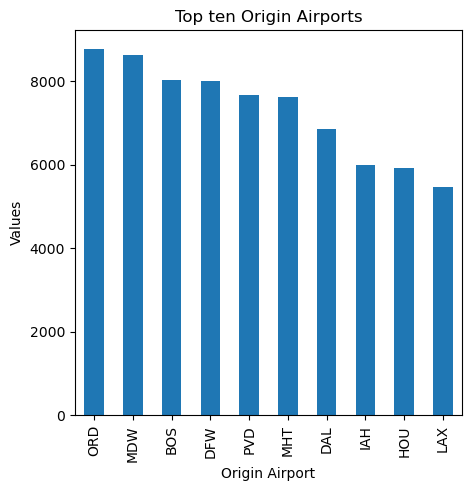

In [19]:
top_10Airport.plot(kind = 'bar', figsize = (5, 5))
plt.xlabel('Origin Airport')
plt.ylabel('Values')
plt.title('Top ten Origin Airports')

Text(0.5, 1.0, 'Top ten Largerst Carriers')

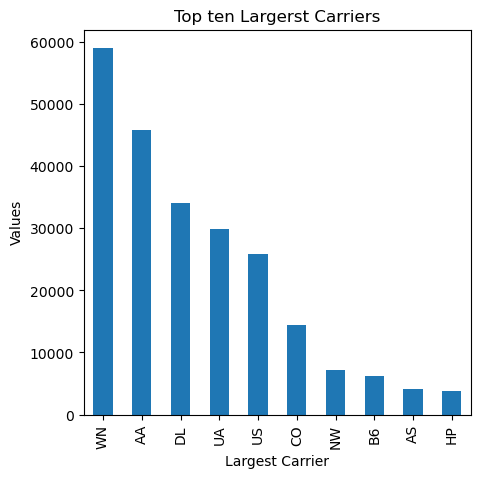

In [20]:
top_10Carrier.plot(kind = 'bar', figsize = (5, 5))
plt.xlabel('Largest Carrier')
plt.ylabel('Values')
plt.title('Top ten Largerst Carriers')

Text(0.5, 1.0, 'Top ten largest Market Share')

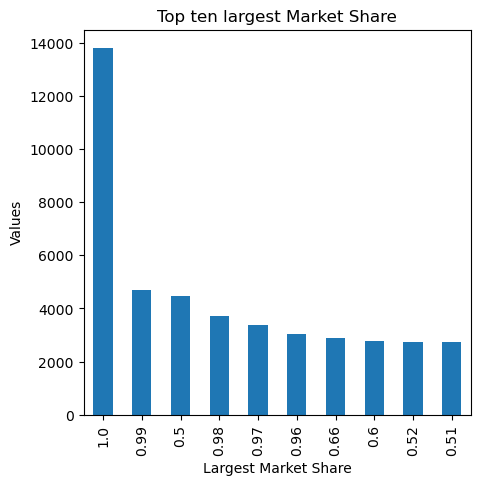

In [21]:
top_10Market.plot(kind = 'bar', figsize = (5, 5))
plt.xlabel('Largest Market Share')
plt.ylabel('Values')
plt.title('Top ten largest Market Share')

In [22]:
compare = df2.groupby('LargestCarrier').MarketShareLG.mean().iloc[:10]

print(compare)

LargestCarrier
3M    0.606300
5J    0.604000
9K    0.975000
9N    0.749630
AA    0.635041
AQ    0.456667
AS    0.629978
B6    0.701603
BF    0.784444
CO    0.737000
Name: MarketShareLG, dtype: float64


Here I did a comparison of the top ten largest carriers based on the mean of their market share. 

<Axes: title={'center': 'Largest Carriers market share'}, ylabel='MarketShareLG'>

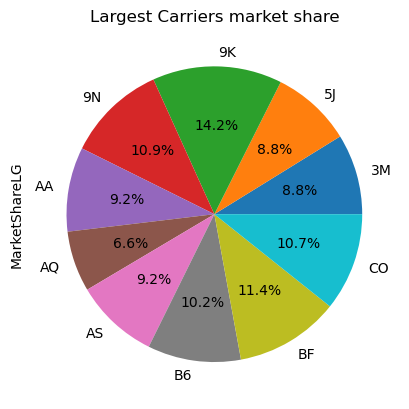

In [23]:
compare.plot.pie(y = 'Largest Carrier', title = 'Largest Carrier''s market share', legend = False, \
                   autopct='%1.1f%%')

The pie chart shows a more graphical representation of the comparison above showing the percentage of each carrier's market share.

In [24]:
df_sample = df2.groupby('LargestCarrier', as_index = False).sum()
df_sample = df_sample.sort_values('AverageFare')

df_sample.head()

,LargestCarrier,OriginAirport,AverageFare,LargestFare,MarketShareLG
65,ZV,PVD,96.20,96.20,1.00
23,KS,BOS,159.16,69.75,0.66
32,OH,MDW,165.05,138.00,0.23
59,XJ,CAK,180.44,180.00,0.87
45,T3,ASE,219.98,201.05,0.21


Here, I decided to create a sample field showing the sum of the largest carrier and sorting the values by the average fare.

In [25]:
df_sample.head(25)

,LargestCarrier,OriginAirport,AverageFare,LargestFare,MarketShareLG
65,ZV,PVD,96.20,96.20,1.0000
23,KS,BOS,159.16,69.75,0.6600
32,OH,MDW,165.05,138.00,0.2300
59,XJ,CAK,180.44,180.00,0.8700
45,T3,ASE,219.98,201.05,0.2100
36,PA,MIAMDW,237.68,251.01,0.8400
34,OP,MDWMIA,249.54,242.74,1.1300
5,AQ,SNASNASNA,331.10,284.65,1.3700
43,SX,CMHCMHCMH,410.55,351.17,2.3000
40,RL,JFKJFKFLL,413.95,375.85,2.1500


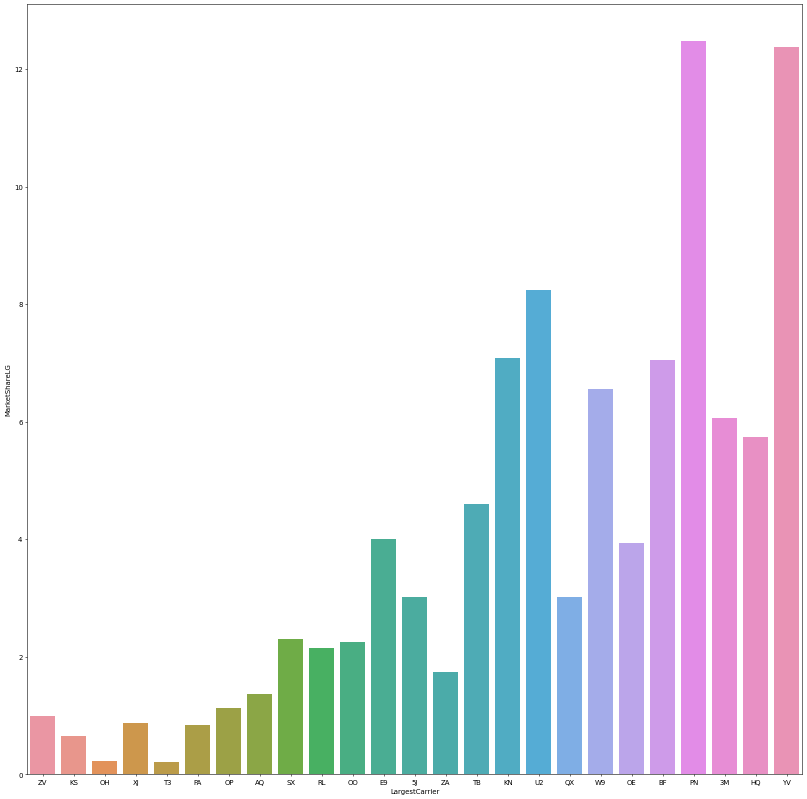

In [26]:
from matplotlib.pyplot import figure
figure(num = None, figsize = (20, 20), dpi =50 , facecolor = 'w', edgecolor = 'r')
sns.barplot(x = 'LargestCarrier', y = 'MarketShareLG', data = df_sample.iloc[:25])
plt.show()

First off, I would like to find the r2 value of the largest market as they relates to the average fare.

In [27]:
model = LinearRegression()
X, y = df1[['LargestFare', 'MarketShareLG']], df1.AverageFare
model.fit(X, y)
r_squared = model.score(X, y)
print('The R2 value is {0:.2f}%'.format(r_squared))

The R2 value is 0.91%


It appears that the R squared value is 91%. This would indicate that there is a high level of correlation between the largest share and the airline with the largest market share.

In [28]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns
df1[numeric_cols].apply(zscore).mean()

AverageFare      2.083821e-16
LargestFare      1.302388e-16
MarketShareLG    6.214251e-16
dtype: float64

After applying the z-test to every needed column, I found an interesting correlation. It appears that all three columns (AverageFare, LargestFare and MarketShareLG) appear to have a strong positive z score. This would indicate that the Alternative Hypothesis would be correct and there is a direct correlation between an airline's market share in a given market and its overall price.

In [29]:
p_value = norm.cdf(df1[numeric_cols].apply(zscore)).mean()
print('The p value mean is {0:.2f}%'.format(p_value))

The p value mean is 0.49%


After finding the p value, we can determine that it is unlikely that the results of an experiment occurred due to random chance.